In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import seaborn as sns

sns.set()

In [79]:
path='D:/DataSets/365/TimeSeries/3/index2018.csv'
df_raw=pd.read_csv(path)
df=df_raw.copy()

In [80]:
df.date=pd.to_datetime(df.date,dayfirst=True)
df.set_index('date',inplace=True)

In [81]:
df=df.asfreq('b')

In [82]:
del df['spx'], df['dax'], df['nikkei']

In [83]:
df=df.fillna(method='ffill')
df['market_value']=df.ftse
del df['ftse']

In [84]:
size=int(len(df)*0.8)
df,df_test=df.iloc[:size],df.iloc[size:]

# The ACF

Text(0.5, 1.0, 'ACF of Prices')

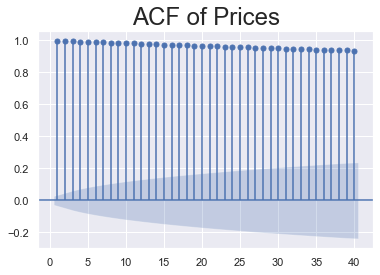

In [85]:
sgt.plot_acf(df.market_value,lags=40,zero=False)
plt.title(label='ACF of Prices',size=24)

### Interpretation
- The effects barely deteriorate over time
- The more lags it has, the better the data is fit but the worser are the predictions (Overfitting) and prone to mistakes

# The PACF

Text(0.5, 1.0, 'PACF for Price')

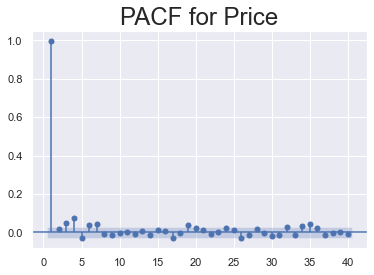

In [86]:
sgt.plot_pacf(df.market_value,zero=False, lags=40,method='ols',alpha=0.05)
plt.title(label='PACF for Price',size=24)

### Interpretation
- The values are extremly close to zero
- Their impact on the model is minimal, thus, they are not relevent
- It is not necesary to include more than 25 lags, because they are almost inside the significance (alpha)
- After 25 lags, most of the values are negative, that could be due of the businessdays and the overlapping months

We use the PACF to select the correct AR-Model, because the PACF shows the individual effect each past value has on the current one.<br>
In this case, we use one, as it is the highest :)

# The AR(1) Model

In [87]:
model_ar=ARMA(df.market_value,order=(1,0))
results_ar=model_ar.fit()

D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [88]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Mon, 24 May 2021   AIC                          55251.196
Time:                        19:58:41   BIC                          55270.760
Sample:                    01-07-1994   HQIC                         55258.052
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5055.8541    485.798     10.407      0.000    4103.707    6008.001
ar.L1.market_value     0.9985      0.001   1298.620      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

## Interpretation
y=mx+b
### row const
 --> const represents b

### row ar.L1.market_value
represents "m"

### Column Coef
represents the values for m and b

### Column z
represents the associated test-statistic for significance

### Column P<|z|
p-values for the test-statistic

### Column [0.025 and 0.975]
represents the critical values for the 95% confidenzintervall

# Higher-Lag AR Models
--> Just change the n argument in order(n,q) to 2 or more 

In [90]:
model_ar2=ARMA(df.market_value,order=(2,0))
results_ar2=model_ar2.fit()
results_ar2.summary()

D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Mon, 24 May 2021   AIC                          55251.742
Time:                        19:58:57   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6410    495.719     10.267      0.000    4118.050    6061.232
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4624           +0.0000j           58.4624            0.5000
-----------------------------------------------------------------------------
"""

## Interpretation
Now we have one more row; three in total and the constant has changed
- Since the p-value is higher than the alpha, we can reject the H0
- But the Price two days ago does not effect to the current price (0.0171 coef). Thats why because all of their effects are on yesterdays price

Now we can try out a 3 and 4 lag AR. The problem is, that it can be overfitting. Due that, we will apply the lag-likelihood Regression Test after that
Be also awayr of the log Likelihood, we prefer higher likelihood and with lower information criterion (AIC,BIC,HQIC)


In [91]:
model_ar3=ARMA(df.market_value,order=(3,0))
results_ar3=model_ar3.fit()
results_ar3.summary()

D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27615.992
Method:                       css-mle   S.D. of innovations             59.179
Date:                Mon, 24 May 2021   AIC                          55241.985
Time:                        20:03:36   BIC                          55274.591
Sample:                    01-07-1994   HQIC                         55253.410
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5301.3440    607.662      8.724      0.000    4110.347    6492.341
ar.L1.market_value     0.9806      0.014     69.632      0.000       0.953       1.008
ar.L2.market_value    -0.0308      0.020     -1.562      0.118      -0.070       0.008
ar.L3.market_value     0.0489      0.014      3.468      0.001       0.021       0.077
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0012           -0.0000j            1.0012           -0.0000
AR.2           -0.1854           -4.5146j            4.5184           -0.2565
AR.3           -0.1854           +4.5146j            4.5184            0.2565
-----------------------------------------------------------------------------
"""

In [92]:
model_ar4=ARMA(df.market_value,order=(4,0))
results_ar4=model_ar4.fit()
results_ar4.summary()

D:\Users\sebas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.565
Method:                       css-mle   S.D. of innovations             59.022
Date:                Mon, 24 May 2021   AIC                          55217.130
Time:                        20:03:59   BIC                          55256.258
Sample:                    01-07-1994   HQIC                         55230.841
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6416    560.007      9.089      0.000    3992.048    6187.235
ar.L1.market_value     0.9770      0.014     69.492      0.000       0.949       1.005
ar.L2.market_value    -0.0286      0.020     -1.455      0.146      -0.067       0.010
ar.L3.market_value    -0.0224      0.020     -1.135      0.256      -0.061       0.016
ar.L4.market_value     0.0728      0.014      5.166      0.000       0.045       0.100
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0011           -0.0000j            1.0011           -0.0000
AR.2            0.9550           -2.0884j            2.2964           -0.1817
AR.3            0.9550           +2.0884j            2.2964            0.1817
AR.4           -2.6036           -0.0000j            2.6036           -0.5000
-----------------------------------------------------------------------------
"""

# LLR-Test

In [93]:
def llr_test(mod_1,mod_2,df=1):
    l1=mod_1.fit().llf
    l2=mod_2.fit().llf
    lr=(2*(l2-l1)) # Why I use this here?
    p=chi2.sf(lr,df).round(3)
    return p

# Comparing Higher-Lag AR Models

In [94]:
llr_test(model_ar2,model_ar3)

0.001

--> because it is less then the alpha, it is significant, so we should choose the model_ar3 instead of model_ar2

In [95]:
llr_test(model_ar3,model_ar4)

0.0